In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0_and_1.csv to 0_and_1 (2).csv


In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# Read the data from the CSV file using NumPy
data = np.genfromtxt("0_and_1.csv", delimiter=',', skip_header=1)
# print(data)

# Extract the target variable Y and reshape it
Y = data[:, 0]
Y = Y.reshape(-1,1)
# print(Y)

# Remove the label column from X and transpose the matrix
X = data[:, 1:]
# print(X)

In [ ]:
# Print the shape of Y and X
print("X", X.shape)
print("Y", Y.shape)

X (8816, 784)
Y (8816, 1)


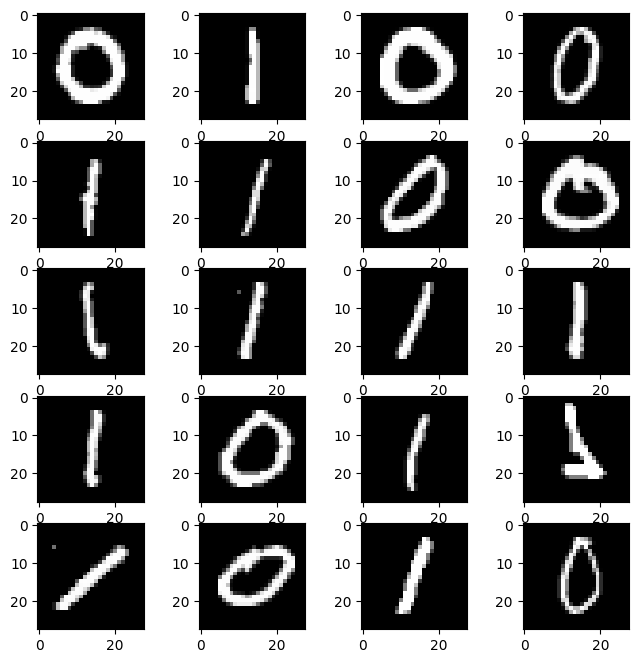

In [ ]:
# Create a figure to plot the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image
for i in range(1, columns * rows + 1):
    X1 = X[i]  # Extract the i-th column (i-th image)
    X1 = X1.reshape(28, 28)  # Reshape the flattened image to (28, 28)
    fig.add_subplot(rows, columns, i)  # Add a subplot to the figure
    plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap

# Show the plot
plt.show()

In [ ]:
import numpy as np

def sigmoid(x, derivative=False):
    """
    Compute the sigmoid function or its derivative.

    :param x: Input value or array.
    :param derivative: If True, compute the derivative of the sigmoid function.
    :return: Sigmoid function or its derivative.
    """
    if derivative == False:
        return 1 / (1 + np.exp(-x))
    else:
        return sigmoid(x, False) * (1 - sigmoid(x, False))

In [ ]:
print(sigmoid(0))                   # Output: 0.5
print(sigmoid(0, derivative=True))  # Output: 0.25

0.5
0.25


In [ ]:
def network_architecture(X, Y):
    # Number of nodes in the input layer
    n_x = X.shape[1]
    # Number of nodes in the hidden layer
    n_h = 10
    # Number of nodes in the output layer
    n_y = Y.shape[1]
    return (n_x, n_h, n_y)

# Get the network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Print the number of nodes in each layer
print("Number of nodes in input layer (n_x):", n_x)
print("Number of nodes in hidden layer (n_h):", n_h)
print("Number of nodes in output layer (n_y):", n_y)

Number of nodes in input layer (n_x): 784
Number of nodes in hidden layer (n_h): 10
Number of nodes in output layer (n_y): 1


In [ ]:
def define_network_parameters(n_x, n_h, n_y):
    # Initialize weights and biases for the first layer
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization with small values
    b1 = np.zeros((n_h, 1))  # Initialize biases with zeros

    # Initialize weights and biases for the second layer
    W2 = np.random.randn(n_y, n_h) * 0.01                              # Random initialization with small values
    b2 = np.zeros((n_y, 1))  # Initialize biases with zeros

    # Store the parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    # print(parameters)
    # print(W1.shape, b1.shape, W2.shape, b2.shape)
    return parameters

In [ ]:
# Get the neural network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Define the network parameters using the obtained dimensions
params = define_network_parameters(n_x, n_h, n_y)

In [ ]:
# Recall that Z = W*X + b & A = g(Z)

# Define the forward propagation function
def forward_propagation(X, params):
    # Calculate the weighted sum and apply activation function for the first layer
    Z1 = params["W1"] @ X.T + params["b1"]
    A1 = sigmoid(Z1, False)

    # Calculate the weighted sum and apply activation function for the second layer
    Z2 = params["W2"] @ A1 + params["b2"]
    A2 = sigmoid(Z2, False)

    # Return the calculated intermediate results
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [ ]:
# Perform forward propagation
refor = forward_propagation(X, params)

# Print the shapes of the intermediate variables
print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 8816)
A1 (10, 8816)
Z2 (1, 8816)
A2 (1, 8816)


In [ ]:
def backward_propagation(params, activations, X, Y):
    """
    Compute the derivatives of the loss with respect to the parameters using backpropagation.

    :param params: Dictionary containing the current parameters.
    :param activations: Dictionary containing the intermediate activations during forward propagation.
    :param X: Input data.
    :param Y: True labels.
    :return: Dictionary containing the derivatives of the loss with respect to the parameters.
    """
    m = X.shape[1]  # Number of training examples

    # Output layer

    dZ2 = (activations["A2"] - Y.T) * sigmoid(activations["Z2"], True)
    dW2 = dZ2 @ activations["A1"].T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Hidden layer
    dZ1 = params["W2"].T @ dZ2 * sigmoid(activations["Z1"], True)
    dW1 = dZ1 @ X / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


def update_parameters(params, derivatives, alpha=0.1):
    """
    Update the parameters using gradient descent.

    :param params: Dictionary containing the current parameters.
    :param derivatives: Dictionary containing the derivatives of the loss with respect to the parameters.
    :param alpha: Learning rate.
    :return: Updated parameters.
    """

    params['W1'] -= derivatives['dW1'] * alpha
    params['b1'] -= derivatives['db1'] * alpha
    params['W2'] -= derivatives['dW2'] * alpha
    params['b2'] -= derivatives['db2'] * alpha
    return params

In [ ]:
# Update the parameters using gradient descent and print the updated parameters

# Calculate the derivatives using backward propagation
derivatives = backward_propagation(params, refor, X, Y)

# Update the parameters using the derivatives and learning rate
params = update_parameters(params, derivatives)

# Print the updated parameters
# print(params)

In [ ]:
def compute_error(Predicted, Actual):
    """
    Compute the mean squared error between predicted values and actual values.

    :param Predicted: Predicted values.
    :param Actual: Actual values.
    :return: Mean squared error.
    """
    diff = Predicted - Actual.T
    square = np.square(diff)
    mean = np.mean(square)
    return mean

In [ ]:
def neural_network(X, Y, num_iterations=10):
    """
    Train a neural network model using gradient descent.

    :param X: Input data.
    :param Y: Target data.
    :param num_iterations: Number of iterations for training.
    :return: Trained parameters and cost history.
    """
    n_x, n_h, n_y = network_architecture(X, Y)
    params = define_network_parameters(n_x, n_h, n_y)
    np.seterr(over='ignore')

    err = []
    print()

    for i in range(num_iterations):
      refor = forward_propagation(X, params)
      derivatives = backward_propagation(params, refor, X, Y)
      params = update_parameters(params, derivatives, 0.1)
      e = compute_error(refor['A2'], Y)
      err.append(e)
      print(f"[EPOCH] {i} [MSE] {e:10f}")

    return params, err




[EPOCH] 0 [MSE]   0.249455
[EPOCH] 1 [MSE]   0.232112
[EPOCH] 2 [MSE]   0.201516
[EPOCH] 3 [MSE]   0.186139
[EPOCH] 4 [MSE]   0.162702
[EPOCH] 5 [MSE]   0.125625
[EPOCH] 6 [MSE]   0.102357
[EPOCH] 7 [MSE]   0.080873
[EPOCH] 8 [MSE]   0.067603
[EPOCH] 9 [MSE]   0.057594
[EPOCH] 10 [MSE]   0.050056
[EPOCH] 11 [MSE]   0.044127
[EPOCH] 12 [MSE]   0.039238
[EPOCH] 13 [MSE]   0.035374
[EPOCH] 14 [MSE]   0.031990
[EPOCH] 15 [MSE]   0.029253
[EPOCH] 16 [MSE]   0.026900
[EPOCH] 17 [MSE]   0.025000
[EPOCH] 18 [MSE]   0.023087
[EPOCH] 19 [MSE]   0.021582
[EPOCH] 20 [MSE]   0.020196
[EPOCH] 21 [MSE]   0.019023
[EPOCH] 22 [MSE]   0.017959
[EPOCH] 23 [MSE]   0.016973
[EPOCH] 24 [MSE]   0.016097
[EPOCH] 25 [MSE]   0.015298
[EPOCH] 26 [MSE]   0.014565
[EPOCH] 27 [MSE]   0.013928
[EPOCH] 28 [MSE]   0.013341
[EPOCH] 29 [MSE]   0.012781
[EPOCH] 30 [MSE]   0.012261
[EPOCH] 31 [MSE]   0.011786
[EPOCH] 32 [MSE]   0.011339
[EPOCH] 33 [MSE]   0.010929
[EPOCH] 34 [MSE]   0.010552
[EPOCH] 35 [MSE]   0.010200
[

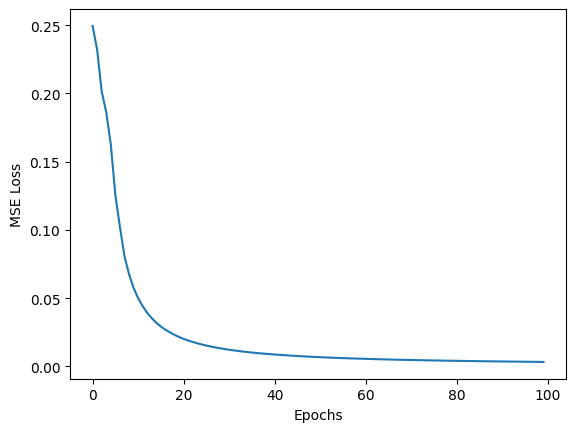

In [ ]:
# Train the neural network model and retrieve the trained parameters and cost history
model, cost = neural_network(X, Y, num_iterations=100)

# Plot the cost history
plt.plot(cost)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
def predict(parameters, X):
    # Perform forward propagation to get the results
    results = forward_propagation(X, parameters)

    # Round the predictions to 0 or 1
    predictions = np.around(results['A2'])

    return predictions

# Make predictions using the trained model
predictions = predict(model, X)

In [ ]:
# Initialize an empty list to store the indices of misclassified examples
Error = []

pred = predictions.flatten()
truth = Y.flatten()

# print(predictions)

for i in range(len(pred)):
  if int(pred[i]) != int(truth[i]):
    Error.append(i)

# Print the indices of misclassified examples
print("Indices of misclassified examples:", Error)

# Calculate the accuracy by subtracting the ratio of misclassified examples from 1 and multiplying by 100
accuracy = ((X.shape[0] - len(Error)) / X.shape[0]) * 100

# Print the accuracy as a percentage
print("Accuracy: {:f}%".format(accuracy))

Indices of misclassified examples: [332, 1364, 4749, 7653, 8199, 8215]
Accuracy: 99.931942%


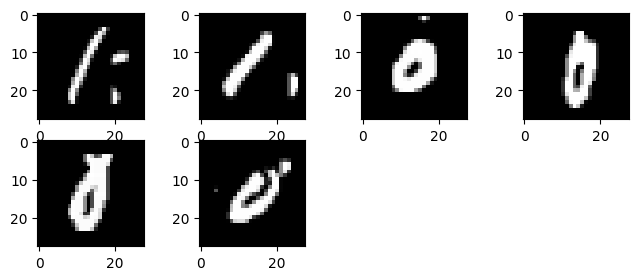

In [ ]:
#Display misclassified images

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image

j = 0
for i in range(1, columns * rows + 1):
    while j < len(Error):
      idx = Error[j]
      X1 = X[idx]  # Extract the i-th column (i-th image)
      X1 = X1.reshape(28, 28)  # Reshape the flattened image to (28, 28)
      fig.add_subplot(rows, columns, i)  # Add a subplot to the figure
      plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap
      j+=1
      break

# Show the plot
plt.show()